# Equações diferenciais ordinárias

## Método de Euler–Cromer

Pode-se mostrar que, ao aplicar o método de Euler a um sistema sujeito a forças conservativas, a energia não se conserva. O problema é que o método de Euler sempre faz uma extrapolação linear do novo estado com base apenas no estado atual. Se as derivadas forem muito grandes, esta extrapolação não é uma aproximação muito boa.

Uma pequena modificação no método de Euler é suficiente para que a sua solução seja conservativa:

\begin{align}
v_{j+1} &= v_j + h f_v(x_j, v_j, t_j) \\
x_{j+1}&= x_j + h v_{j+1}.
\end{align}

No termo em $h$ na posição no método de Euler, $v_j$ se torna $v_{j+1}$.  Esta modificação faz com que o método de Euler consiga "ver no futuro", o novo estado depende tanto do estado anterior quanto dele mesmo. Este método modificado é chamado de [método de Euler–Cromer](https://sci-hub.se/10.1119/1.12478) (Abby Aspel?). 

### Exercício 1

**a.** Resolva o oscilador harmônico usando o método de Euler tradicional. Considere $k=1$, $m=1$, e condições iniciais $x=1$ e $v=0$ quando $t=0$. Use um passo $h=0.15$, e resolva até $t=10$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

#solucao numerica
k = 1
m = 1
omega = np.sqrt(k/m)
x0 = 1
v0 = 0
t0 = 0
h = 0.15
tf = 10
N = int((tf - t0) / h)

def F(x, v, t):
    return - k * x / m

t_osc = np.zeros(N)
t_osc[0] = t0
v_osc = np.zeros(N)
v_osc[0] = v0
x_osc = np.zeros(N)
x_osc[0] = x0
x_anal = np.zeros(N)
x_anal[0] = x0
v_anal = np.zeros(N)
v_anal[0] = v0

for j in range(N):
   t_osc[j] = t0 + j * h
   x_anal[j] = x0 * np.cos(omega * t_osc[j])
   v_anal[j] = - x0 * omega *np.sin(omega * t_osc[j])

for i in range(N-1):
    x_osc[i+1] = x_osc[i] + h * v_osc[i]
    v_osc[i+1] = v_osc[i] + h * F(x_osc[i], v_osc[i], t_osc[i])

**b.** Resolva novamente o problema usando o método de Euler–Cromer. Guarde o resultado em um array separado.

In [2]:
xc = np.zeros(N)
xc[0] = x0
vc = np.zeros(N)
vc[0] = v0

for i in range(N-1):
    vc[i+1] = vc[i] + h * F(xc[i], vc[i], t_osc[i])
    xc[i+1] = xc[i] + h * vc[i+1]

**c.** Faça o gráfico das duas soluções, junto com a solução analítica.

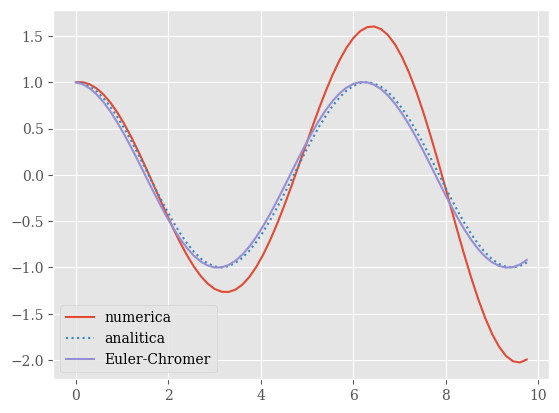

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

fig, ax = plt.subplots()
ax.plot(t_osc, x_osc, label='numerica')
ax.plot(t_osc, x_anal, ls=':', label='analitica')
ax.plot(t_osc, xc, label='Euler-Chromer')
ax.legend()
plt.show()

A solução com o método de Euler–Cromer é muito melhor, mas ainda não é perfeita. Diminuindo o intervalo $h$, você pode melhorar a solução. Mas, como conferir se a energia se conserva?

**d.** Faça o gráfico do *espaço de fase* da solução, isto é, um gráfico da velocidade em função da posição. Novamente, desenhe a curva para as duas soluções e para a solução analítica.

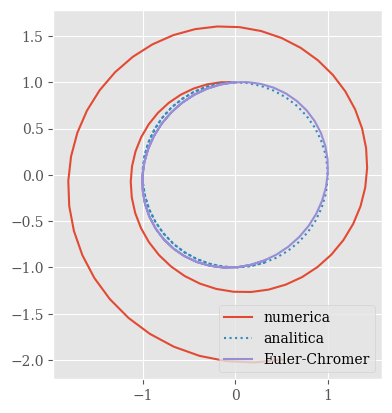

In [4]:
fig, ax = plt.subplots()
ax.plot(v_osc, x_osc, label='numerica')
ax.plot(v_anal, x_anal, ls=':', label='analitica')
ax.plot(vc, xc, label='Euler-Chromer')
ax.set_aspect('equal')
ax.legend()
plt.show()

Se o programa funcionou corretamente, a solução com o método de Euler tem amplitudes e velocidades cada vez maiores. Já o método de Euler–Cromer nos dá uma solução que fica confinada à vizinhança da solução real do problema. Métodos que conservam a energiam como o de Euler–Cromer, são chamados de *métodos simpléticos*.

### Exercício 2

A oscilação de um pêndulo é aproximadamente igual a um oscilador harmônico simples para ângulos pequenos. Vamos ver o que acontece quando não fazemos esta aproximação.

Suponha que o pêndulo tenha uma haste rígida de comprimento $L = 1\,\mathrm{m}$, e uma massa $m = 1\,\mathrm{kg}$ presa à extremidade livre. Neste caso o movimento é descrito pela dinâmica de corpos rígidos, dada pelas equações

\begin{cases}
&I \dfrac{\mathrm{d}\omega}{\mathrm{d}t} = \tau \\
&\dfrac{\mathrm{d}\theta}{\mathrm{d}t} = \omega,
\end{cases}

onde $\tau$ é o torque, $I$ é o momento de inércia, $\omega$ é a velocidade angular, e $\theta$ é o ângulo que o pêndulo faz com a vertical. No nosso caso, $I = mL^2$, e o torque é causado pela força da gravidade, $\tau = -mgL \sin \theta$. Assim,

\begin{align}
    mL^2 \frac{\mathrm{d}\omega}{\mathrm{d}t} &= -mgL \sin \theta \\
    \frac{\mathrm{d}\omega}{\mathrm{d}t} &= -\frac{mgL}{mL^2} \sin \theta
\end{align}

\begin{cases}
    &\dfrac{\mathrm{d}\omega}{\mathrm{d}t} = -\dfrac{g}{L} \sin \theta \\
    &\dfrac{\mathrm{d}\theta}{\mathrm{d}t} = \omega.
\end{cases}

Este sistema de EDOs acopladas tem solução analítica em termos de funções elípticas de Jacobi, veja [Beléndez *et al* (2007)](http://www.sbfisica.org.br/rbef/pdf/070707.pdf). Porém, podemos resolver facilmente este sistema com o que já aprendemos até aqui.

Calcule a solução numérica da oscilação do pêndulo para uma posição inicial $A = 10^\circ, 45^\circ, 90^\circ$ e $179^\circ$ (lembre que devemos fazer os cálculos em radianos), partindo do repouso ($\omega = 0$), para um intervalo de tempo de 10 segundos.

Na mesma figura, desenhe também o gráfico da solução analítica aproximada para ângulos pequenos ($\sin \theta \approx \theta$), e compare com os seus resultados.

In [ ]:
A1 = 10 * np.pi / 180
A2 = 45 * np.pi / 180
A3 = 90 * np.pi / 180
A4 = 179 * np.pi / 180

omega0 = 0
delta_t = 10

### Exercício 3

A trajetória de um corpo em queda livre é facilmente calculada analiticamente na ausência de arraste do ar. Levando em conta o arraste, por outro lado, deixa as equações de movimento intratáveis, e precisamos resolver o problema numericamente.

Considere uma esfera lisa de massa $0{,}5\,\text{kg}$, com um raio de $5\,\text{cm}$, solta do repouso a uma altura de $1\,\text{km}$. Além da força gravitacional, a esfera está sujeita a uma força de arraste $D$ que se opõe ao movimento, tal que

\begin{align}
F = \left\{ \
\begin{array}{ll}
-m g - D(v) \qquad &\text{se}\ v > 0, \\
-m g + D(v) \qquad &\text{se}\ v < 0,
\end{array}
\right .
\end{align}

com velocidades positivas para cima. O arraste pode ser expresso através de

\begin{align}
D(v) = \frac{1}{2} \rho v^2 C_\text{D} A,
\end{align}

onde $\rho$ é a densidade do ar ($1{,}225\,\text{kg}\,\text{m}^{-3}$), $A$ é a área projetada da esfera, e $C_\text{D}$ é o coeficiente de arraste, que para uma esfera lisa vale $0{,}47$.

As equações do movimento são dadas pelas dinâmica newtoniana:

\begin{align}
\frac{\text{d}v}{\text{d}t} &= \left\{ \
\begin{array}{ll}
-g - \frac{D(v)}{m} \qquad &\text{se}\ v > 0, \\
-g + \frac{D(v)}{m} \qquad &\text{se}\ v < 0,
\end{array}
\right . \\
\frac{\text{d}y}{\text{d}t} &= v.
\end{align}

**a.** Calcule numericamente a solução até $25\,\text{s}$ depois do lançamento.

**b.** Faça dois gráficos.

* No primeiro, desenhe a altura calculada em função do tempo, e coloque no mesmo gráfico a solução analítica no caso sem arraste. Limite o gráfico a altitudes positivas usando `ax.set_ylim(min, max)`.
* No segundo, desenhe a velocidade calculada em função do tempo, e desenhe também uma linha assintótica horizontal com o valor da *velocidade terminal*. Esta velocidade pode ser facilmente calculada fazendo $F = 0$ (o arraste e a gravidade se equilibram), e isolando $v$.